In [1]:
# Importing needed Libraries
import os
import pandas as pd
import warnings
from IPython.core.display_functions import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#Importing data
path = 'Data/winequality-white.csv'
df_white = pd.read_csv(path, header=0, delimiter=';')
path = 'Data/winequality-red.csv'
df_red = pd.read_csv(path, header=0, delimiter=';')
# Disabling Warnings
warnings.filterwarnings("ignore")

The first step of this project was analysing the data to get a general understanding of the data, I first used a standard graph function to display the distribution of quality over each dataset

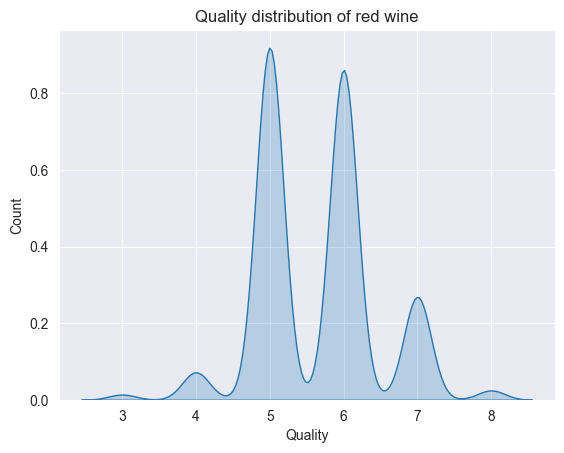

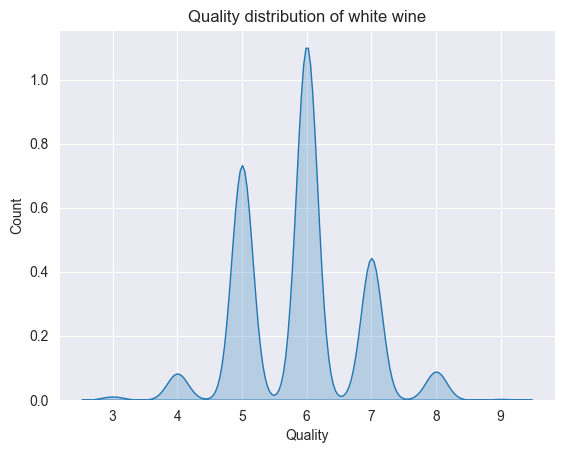

In [2]:
def Display_Quality_Distribution(df,wineType):
    sns.kdeplot(x=df['quality'], fill=True)
    plt.xlabel('Quality')
    plt.ylabel('Count')
    plt.title(f'Quality distribution of {wineType} wine')
    plt.show()
    # Within my report I present a different graph type however due to formatting issues when using a notebook, this is the best graph to display this information

Display_Quality_Distribution(df_red,'red')
Display_Quality_Distribution(df_white,'white')

After this fairly basic exploration I decided to explore how some other values affect the quality variable, the most impactful of which I found was the alcohol content for which I created this function to visualize

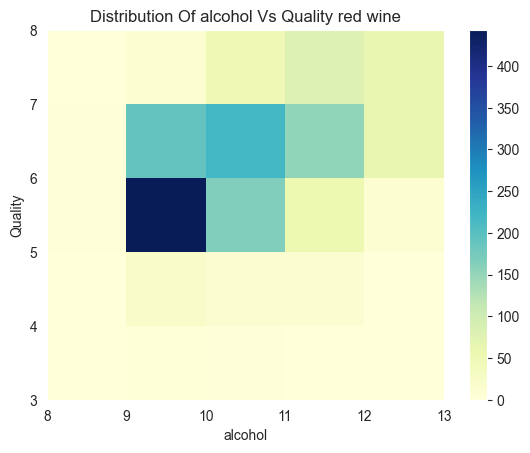

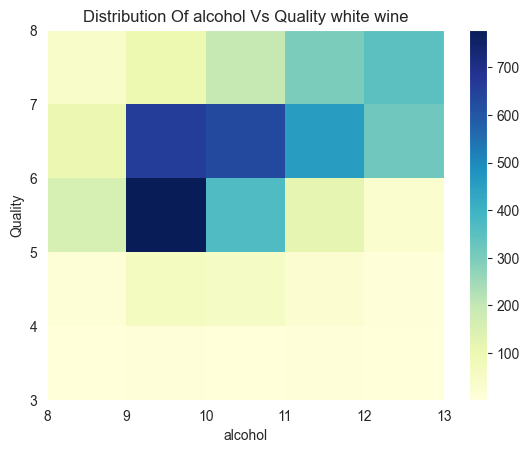

In [3]:
def display_heatmap(df, wineType, category):
    category_bins = [8, 9, 10, 11, 12, 13]
    quality_bins = [3, 4, 5, 6, 7, 8]

    plt.hist2d(df[f'{category}'], df['quality'], bins=[category_bins, quality_bins], cmap='YlGnBu')
    plt.colorbar()
    plt.xlabel(f'{category}')
    plt.ylabel('Quality')

    plt.xticks(category_bins)
    plt.yticks(quality_bins)

    plt.title(f"Distribution Of {category} Vs Quality {wineType} wine")

    plt.show()
display_heatmap(df_red, "red", "alcohol")
display_heatmap(df_white, "white", "alcohol")
#By changing the category argument, you can create several different heat maps to
#explore the affects of different variables on the quality of wine

The Next Step of this project was categorising wine into 3 categories (low,mid and high) this was done through the following code

In [4]:
def split_based_on_alcohol_content(df):
    alcohol_mean = df['alcohol'].mean()
    alcohol_std = df['alcohol'].std()

    low = alcohol_mean - alcohol_std
    mid = alcohol_mean + alcohol_std

    df['alcohol_cat'] = pd.cut(df['alcohol'], bins=[0, low, mid, float('inf')], labels=['low', 'mid', 'high'])
    return df
df_red = split_based_on_alcohol_content(df_red)
df_white = split_based_on_alcohol_content(df_white)

After this we can visualise this split with the following code

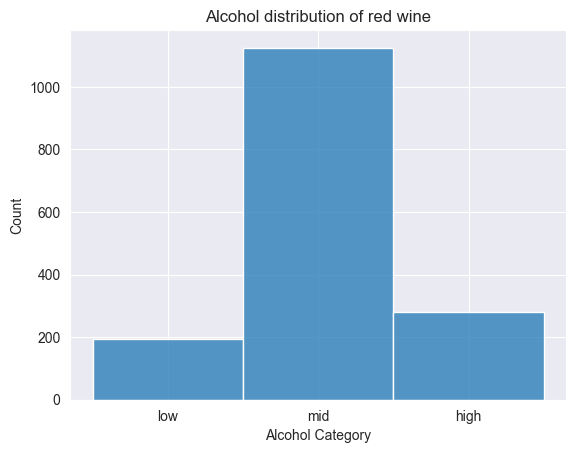

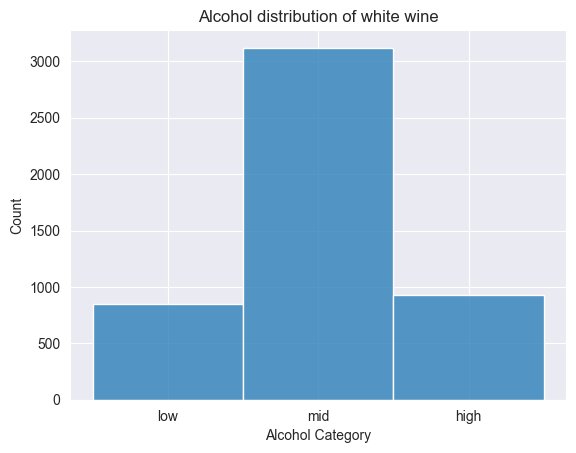

In [5]:
def Display_Alcohol_Distribution(df,wineType):
    sns.histplot(df['alcohol_cat'], bins=3)
    plt.xlabel('Alcohol Category')
    plt.ylabel('Count')
    plt.title(f'Alcohol distribution of {wineType} wine')
    plt.show()

Display_Alcohol_Distribution(df_red,'red')
Display_Alcohol_Distribution(df_white,'white')

In order to display the affects of alcohol category against quality I created this function

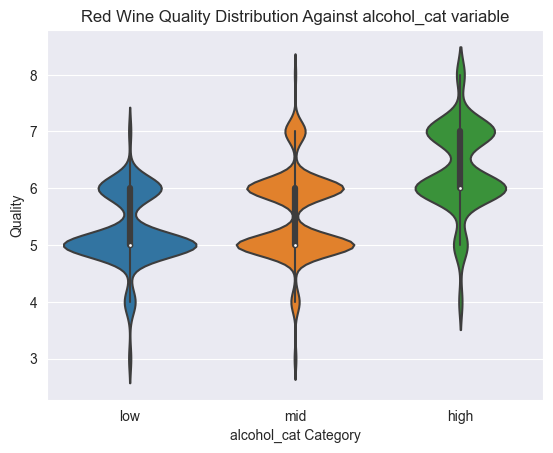

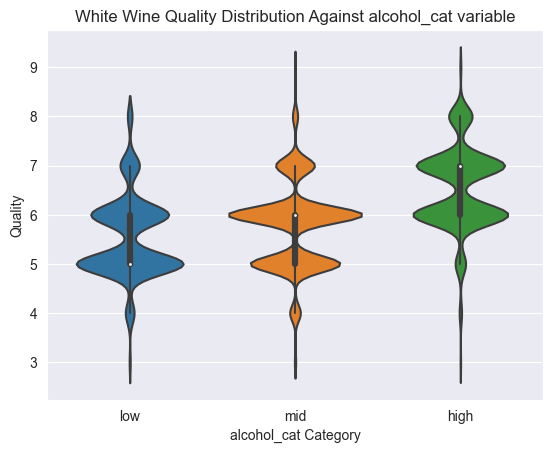

In [6]:
def violin_graph_vs_quality(df, wine_type, category): # The category argument allows for you to change the category you wish to compare to quality
    sns.violinplot(x=f'{category}', y="quality", data=df)
    plt.title(f"{wine_type} Wine Quality Distribution Against {category} variable")
    plt.xlabel(f"{category} Category")
    plt.ylabel("Quality")
    plt.show()
violin_graph_vs_quality(df_red, "Red", "alcohol_cat")
violin_graph_vs_quality(df_white, "White", "alcohol_cat")

From this visualisation we are able to see that throughout both datasets, higher
alcohol content is viewed as a positive when comparing wine quality

Following this, the next task was to categorise each wine into a binary isSweet
variable based on residual sugar content. This is done with the following function:

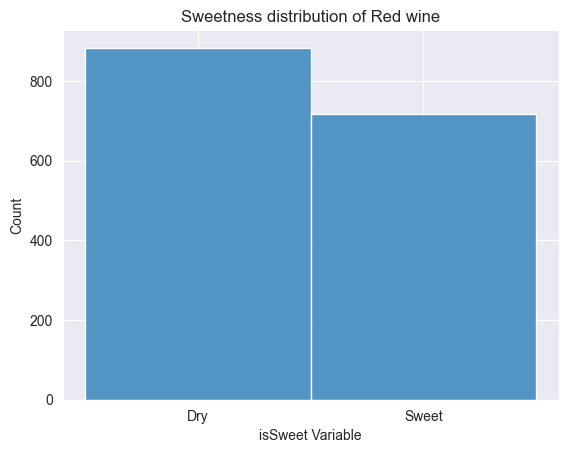

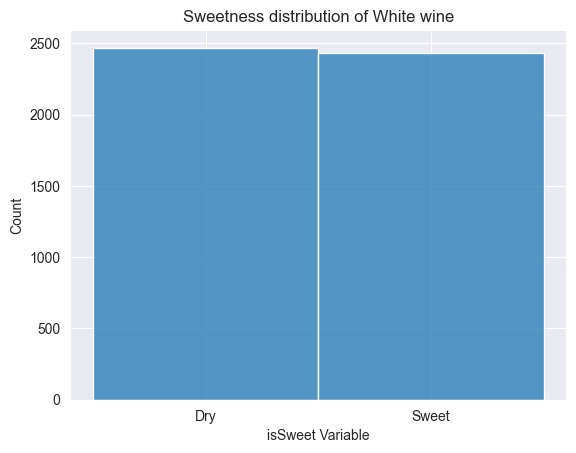

In [7]:
def split_based_on_residual_sugar_content(df):
    bins = [0, df['residual sugar'].quantile(1 / 2), df['residual sugar'].quantile(2 / 2)]
    labels = ['Dry', 'Sweet']
    df['isSweet'] = pd.cut(df['residual sugar'], bins=bins, labels=labels)
    return df
df_red = split_based_on_residual_sugar_content(df_red)
df_white = split_based_on_residual_sugar_content(df_white)
# We can visualise this split by adjusting our previous function
def Display_Sugar_Distribution(df,wineType):
    sns.histplot(df['isSweet'], bins=2)
    plt.xlabel('isSweet Variable')
    plt.ylabel('Count')
    plt.title(f'Sweetness distribution of {wineType} wine')
    plt.show()
Display_Sugar_Distribution(df_red,"Red")
Display_Sugar_Distribution(df_white, "White")

We can then visualise the affect this variable has on perceived quality using our previous
violin graph function

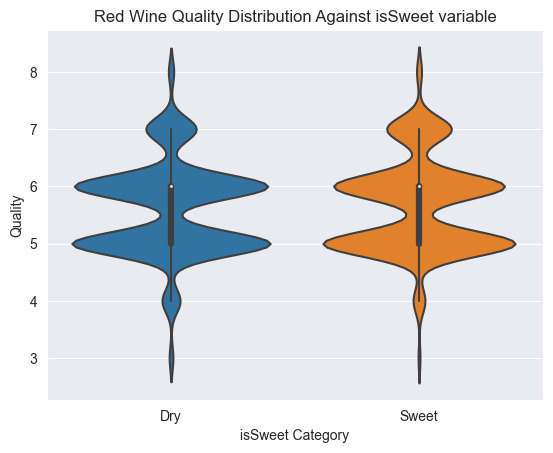

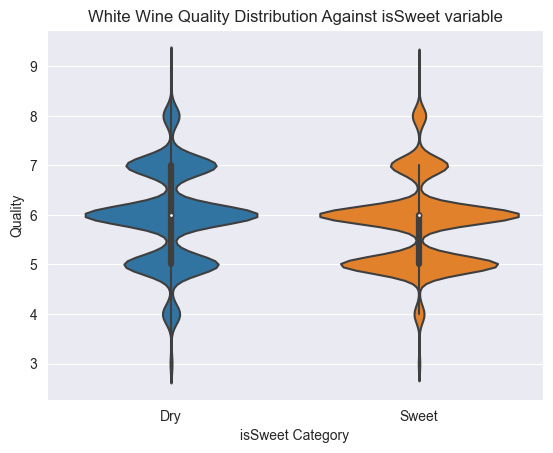

In [8]:
violin_graph_vs_quality(df_red,"Red","isSweet")
violin_graph_vs_quality(df_white,"White","isSweet")

We can also use our heatmap function to see how the underlying residual sugar levels affect perceived quality

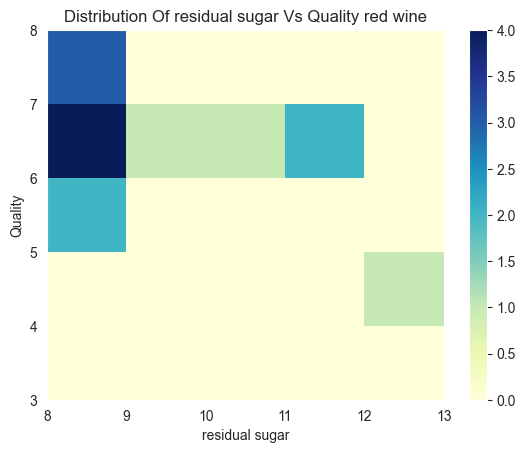

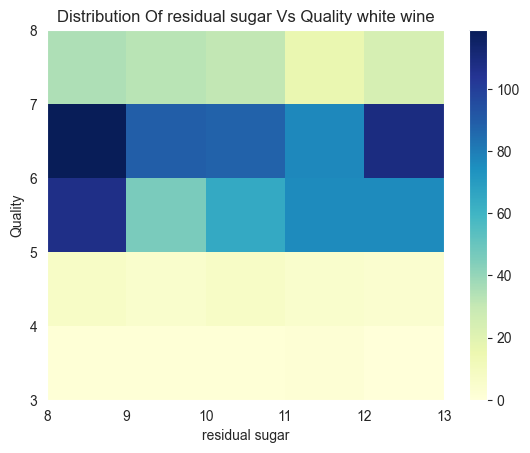

In [9]:
display_heatmap(df_red, "red", "residual sugar")
display_heatmap(df_white, "white", "residual sugar")

We can see from these graphs that sugar content has a large impact on wine quality, more specifically
dryer wines are typically perceived as higher quality within red wines, however with white wines, there
are spots in both high and low residual sugar levels in which wines are perceived higher quality. This
indicates that both sweet and dry wines are seen as higher quality, however dryer wines contain a
larger subgroup of higher quality above the 6 rating

The next task was exploring how other variables affect each other and the quality variable
to do this I created the following function to create a correlation matrix and a heatmap
visualisation

This is the quality correlation matrix for Red Wine
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


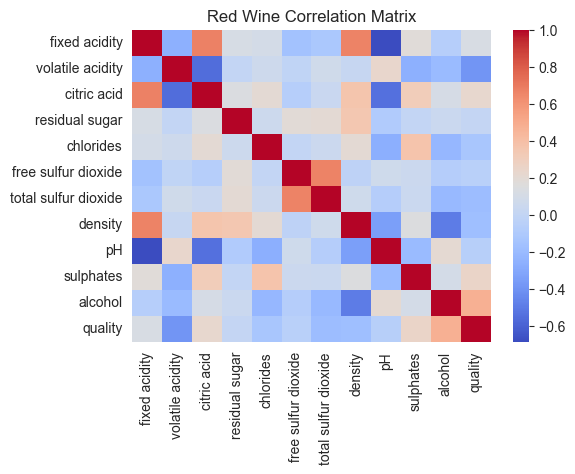

This is the quality correlation matrix for White Wine
fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64


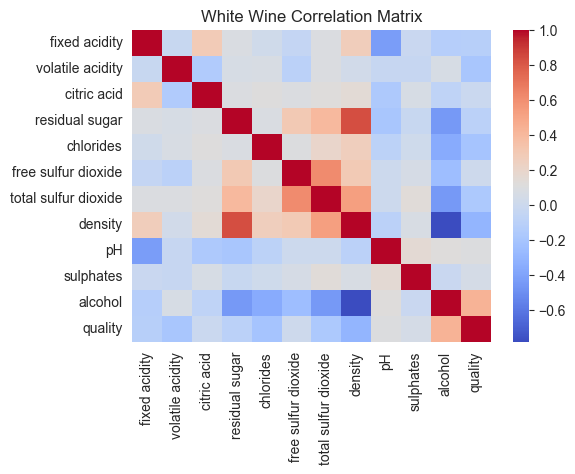

In [10]:
def create_correlation_matrix(df, wine_type):
    correlation_matrix = df.corr()
    quality_correlation = correlation_matrix['quality']
    print(f"This is the quality correlation matrix for {wine_type} Wine")
    print(quality_correlation)
    sns.heatmap(correlation_matrix, cmap='coolwarm')
    plt.xticks(rotation=90)
    plt.title(f"{wine_type} Wine Correlation Matrix")
    plt.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.30)
    plt.show()
create_correlation_matrix(df_red, "Red")
create_correlation_matrix(df_white, "White")

Doing this gives us the correlation from each variable to perceived quality, ranking these gives us the following

White Wine:
Alcohol (0.435575)
Density (-0.307123)
Chlorides (-0.209934)
Volatile acidity (-0.194723)
Total sulfur dioxide (-0.174737)
Fixed acidity (-0.113663)
pH (0.099427)
Residual sugar (-0.097577)
Sulphates (0.053678)
Citric acid (-0.009209)
Free sulfur dioxide (0.008158)

Red Wine:
Alcohol (0.476166)
Volatile acidity (-0.390558)
Sulphates (0.251397)
Citric acid (0.226373)
Total sulfur dioxide (-0.185100)
Density (-0.174919)
Chlorides (-0.128907)
Fixed acidity (0.124052)
pH (-0.057731)
Free sulfur dioxide (-0.050656)
Residual sugar (0.013732)
This gives us a good indication of what variables we can remove in order to refine our dataset

In [11]:
# After testing I decided to drop the following variables
dropped_red = ["alcohol", "residual sugar", "citric acid", "free sulfur dioxide"]
dropped_white = ["citric acid", "free sulfur dioxide", "alcohol", "residual sugar"]
# Alcohol and Residual Sugar are givens as we have other variables to represent them

After Identifying the variables I wished to drop I constructed a simple function to remove them from my datasets

In [12]:
def prune_dataset(df, removed):
    df_new = df.drop(removed, axis=1)
    return df_new
df_red = prune_dataset(df_red,dropped_red)
df_white = prune_dataset(df_white,dropped_white)

The final piece of data cleanup I needed to do was onehot encoding on our quality variable to better
represent our target variable. I did this using the following function

In [13]:
def represent_quality_as_binary(df):
    median_quality = df['quality'].median()

    # Create a new column 'quality_binary' and assign a binary value based on the median quality
    df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > median_quality else 0)

    # Drop the original 'quality' column
    df.drop('quality', axis=1, inplace=True)

    # Print the first 5 rows of the modified dataset
    return df
df_red = represent_quality_as_binary(df_red)
df_white = represent_quality_as_binary(df_white)

After this, our next step is to tune our hyperparameters to fit our two dataset. I used this step to
also tune which variables give the most relevant information. The two functions I used for this included:
Randomized Search Optimization and Grid Search Optimization with the following functions.

Randomized Search was faster for tuning variables to get the highest accuracy, however Grid Search gave a
more tuned set of variables in the end so this is what I used to create my final Hyper Parameters

In [14]:
def RandomizedSearch_optimization(df):
    df = pd.get_dummies(df)

    training_x = df.drop('quality_binary', axis=1)
    training_y = df['quality_binary']

    x_train, x_test, y_train, y_test = train_test_split(training_x, training_y, test_size=0.2, random_state=42)

    param_dist = {'n_estimators': [10, 50, 100, 200],
                  'max_depth': [None, 5, 10, 20],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}
    rf = RandomForestClassifier()
    randomized_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
    randomized_search.fit(x_train,y_train)

    print('Best hyperparameters:', randomized_search.best_params_)
    print('Best score:', randomized_search.best_score_)

    return randomized_search


def GridSearch_optimization(df):
    df = pd.get_dummies(df)

    training_x = df.drop('quality_binary', axis=1)
    training_y = df['quality_binary']

    x_train, x_test, y_train, y_test = train_test_split(training_x, training_y, test_size=0.2, random_state=42)

    param_grid = {'n_estimators': [10, 50, 100, 200],
                  'max_depth': [None, 5, 10, 20],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}
    rf = RandomForestClassifier()
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train,y_train)

    print('Best hyperparameters:', grid_search.best_params_)
    print('Best score:', grid_search.best_score_)

    #return grid_search

In [15]:
# You can use this cell to run either of the optimizations
RandomizedSearch_optimization(df_red)
RandomizedSearch_optimization(df_white)
#GridSearch_optimization(df_red)
#GridSearch_optimization(df_white)

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Best score: 0.8983639705882354
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best score: 0.856046537388902


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

The best hyperparameters I attained using the gridsearch optimzation were the following:

For red wine:
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.9085294117647059

For white wine:
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8624250658117653

The machine Learning Approach I finally chose to use these parameters was a Randomized Forest Classifier
This is the function I created to create this classifier:

In [16]:
def construct_random_forest_classifiction(df, wine_type):
    df = pd.get_dummies(df)

    training_x = df.drop('quality_binary', axis=1)
    training_y = df['quality_binary']

    x_train, x_test, y_train, y_test = train_test_split(training_x, training_y, test_size=0.2, random_state=42)
    # Create the classifier
    # White Wine Classifier:
    if wine_type == "White":
        rfc = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
    else:
        # Red Wine Classifier:
        rfc = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)

    rfc.fit(x_train, y_train)
    # Create a prediction
    y_pred = rfc.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

In [17]:
# Run this to create and test the classifier for red wine
construct_random_forest_classifiction(df_red,"Red")

Accuracy: 0.90625


In [18]:
# Run this to create and test the classifier for white wine
construct_random_forest_classifiction(df_white, "White")

Accuracy: 0.8765306122448979


Using this classifier I came to an accuracy of 0.906 for red wine and 0.876 for white wine which I am quite happy with
After Several Iterations Of Testing I was not able to get this any higher however the threshold I was aiming for was
above 0.7 which I have exceeded quite well